# 4TIN811U Machine Learning & Deep Learning
# TP 5 - Exercices sur les premières semaines

## Manipulations de tableaux avec Numpy

In [1]:
# %matplotlib widget
import numpy as np

### Normes
On définit les deux fonctions suivantes, destinées à prendre en entrée des vecteurs `x` et `y`.

In [2]:
def f1(x, y):
    return np.square(np.abs(np.subtract(x, y)))

def f2(x, y):
    return np.square(np.linalg.norm(np.subtract(x, y)))

In [3]:
# Vos tests ici
x = np.array([1,2,3])
y = np.array([4,5,6])

print ("resultat de f1 :", f1(x, y))
print ("resultat de f2 :", f2(x, y))

resultat de f1 : [9 9 9]
resultat de f2 : 27.0


### Question 1
- Que calculent ces deux fonctions ? Expliquez la différence entre les deux.
- Si `x` et `y` sont des vecteurs à $n$ éléments, quelle est la taille des vecteurs retournés ? Pourquoi ?
- Qu'observez-vous quand `x` et `y` ont taille $1$ ?
- Dans la fonction de poids $w^{(i)}$ de la régression locale, laquelle est à utiliser ?

*Réponses :* 

f1 calcule le carré de la difference absolue de x, y.
f2 calcule la norme du vecteur x - y.

f1 aura une taille de n elemnts. 
f2 aura une taille de 1 elements.

Si x et y possede un seul element, alors la norme sera faite sur un element ce qui sera equivalent a f1.

Celle qui sera utiliser pourra etre f2 pour calculer la loss
pour la formule wi on utilise f2 


### Question 2
Supposons maintenant que, pour un vecteur $x$, vous vouliez calculer $||x||^2$, où $||\cdot||$ est la norme euclidienne. Comment le faire de façon efficace (avec ou sans `numpy`) ? Expliquez pourquoi `np.linalg.norm(x) ** 2` effectue des calculs inutiles.

*Réponse :* 
Par ce qu'il calcule d'abord la norme est le met apres aux carré or, il aurait pu le mettre directement au carré car il y a qu'une dimension


### Matrices
On définit les trois fonctions suivantes, destinées à prendre en entrée une matrice `X` à deux dimensions.

In [7]:
def g1(X):
    return np.linalg.inv(X)

def g2(X):
    return 1 / X

def g3(X):
    return np.power(X, -1)

In [14]:
# Vos tests ici
x = np.array([[5.0, 7.1, 2.4], [4.4, 6.4, 8.4], [2.7, 1.3, 3.6]])
print (x)

print("resultat de g1 :", g1(x))
print("resultat de g2 :", g2(x))
print("resultat de g3 :", g3(x))

[[5.  7.1 2.4]
 [4.4 6.4 8.4]
 [2.7 1.3 3.6]]
resultat de g1 : [[ 0.14885777 -0.27560796  0.54384672]
 [ 0.08400884  0.14148858 -0.38614591]
 [-0.14197986  0.15561287  0.00933432]]
resultat de g2 : [[0.2        0.14084507 0.41666667]
 [0.22727273 0.15625    0.11904762]
 [0.37037037 0.76923077 0.27777778]]
resultat de g3 : [[0.2        0.14084507 0.41666667]
 [0.22727273 0.15625    0.11904762]
 [0.37037037 0.76923077 0.27777778]]


### Question 3
- Que calculent ces trois fonctions ? Expliquez leurs différences.
- Dans la formule exacte pour la régression linéaire (qui s'écrit mathématiquement $(X^TX)^{-1}X^TY$), laquelle de ces formules allez-vous utiliser ? Pourquoi ?

*Réponses :* 

g1 calcule la matrice inverse

g2 et g3 divise mettent a la puisse -1 chaque element 

on utilise g1(X) car on veut calculer la matrice inverse, pour résoudre le systeme

On définit les trois fonctions suivantes, destinées à prendre en entrée des vecteurs `x` et `y`.

In [17]:
def h1(x, y):
    return x.T @ y

def h2(x, y):
    x = x[:,None]
    y = y[:,None]
    return x.T @ y

def h3(x, y):
    x = x[:,None]
    y = y[:,None]
    return x @ y.T

In [33]:
# Vos tests ici
x = np.array([1, 2, 3])
y = np.array([4, 5, 6])

print("resultat de g1 :", h1(x, y))
print("resultat de g2 :", h2(x, y))
print("resultat de g3 :", h3(x, y))

resultat de g1 : 32
resultat de g2 : [[32]]
resultat de g3 : [[ 4  5  6]
 [ 8 10 12]
 [12 15 18]]


### Question 4
Que calculent ces trois fonctions ? Expliquez pourquoi elles donnent un résultat différent.

*Réponses :* 

h1 calcule le produit de 2 matrice
[:,None] permet de rajouter une dimension.
Ainsi h2 fait le meme calcule que h1
h3 fait donc la meme chose mais pour obtenir une matrice (3,3) au lieu de (1,1)

### Question 5
Dessinez un graphique en deux dimensions des points $x = (x_1, x_2)$ qui satisfont l'équation $\theta^Tx = 3$, où $\theta = (2, 3)$.
À quel objet cette équation correspond ? Donnez une équation décrivant cet objet sous une forme plus standard.

*Réponse :* 

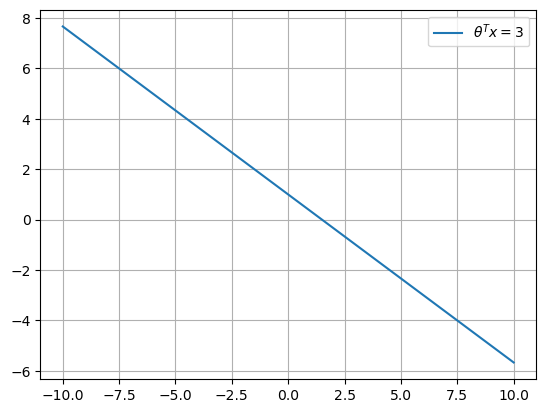

In [58]:
theta = np.array([2, 3])
result = 3

x1_values = np.linspace(-10, 10, 100)

x2_values = (result - theta[0] * x1_values) / theta[1]
plt.figure()

plt.plot(x1_values, x2_values, label=r'$\theta^T x = 3$')
plt.grid(True)
plt.legend()
plt.show()

## Méthode de Newton

On considère la fonction $f\colon \mathbb{R}^2 \to \mathbb{R}$ telle que $$f(x, y) = (x^2 + y - 11)^2 + (x + y^2 - 7)^2.$$

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm

def f(x, y):
    return (x ** 2 + y - 11) ** 2 + (x + y ** 2 - 7) ** 2

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

X = np.arange(-5, 5, .1)
Y = np.arange(-5, 5, .1)
X, Y = np.meshgrid(X, Y)
f_vect = np.vectorize(f)
Z = f_vect(X, Y)

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, alpha=.7,
                       linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=.5, aspect=5)
plt.show()

1. En utilisant la méthode de Newton à plusieurs dimensions, on souhaite trouver les minimums et maximums locaux de $f$. Commencez par calculer le gradient et la matrice hessienne de $f$, et implémentez la méthode de Newton.

*Réponse :* 

In [ ]:
def gradient_f(x, y):
    pass

def hessian_f(x, y):
    pass

def newton_multidim(f, df, theta, max_iter=1000, epsilon=1e-10):
    """Finds a root of multivariate function f given its gradient df and an initial guess theta.
       Assumes that a value theta is a root if np.linalg.norm(f(theta)) < epsilon.
       Raises an exception if no such value is found within max_iter iterations."""
    pass

2. Implémentez une façon de trouver plusieurs extremums en faisant démarrer la méthode de Newton de nombreux points de l'espace. Faites attention à ne pas inclure plusieurs fois les mêmes extremums avec des valeurs numériques légèrement différentes. Pour cela, implémentez la méthode `add_point_if_far` qui ajoute un point à une liste si et seulement si le point n'est à distance $< \epsilon$ d'aucun autre point dans la liste.

Note : il est difficile d'être sûr d'avoir trouvé exhaustivement tous les extremums avec des méthodes numériques ; cette fonction a au moins 9 points où le gradient s'annule, incluant au moins quatre minimums locaux et un minimum local.

In [ ]:
def add_point_if_far(points, new_point, eps=1e-6):
    """Given a list `points` of points of the same dimension, adds the point `new_point` to the list
       if the distance from new_point to any point of the list `points` is not smaller than `eps`."""
    pass

# Find all (or at least a few) points where the gradient vanish.
pass

3. Comment vérifier rapidement la cohérence des points que vous avez obtenus ; correspondent-ils bien à des points où le gradient s'annule ? Vérifiez de deux manières :
- en utilisant la fonction `gradient_f`,
- en vérifiant la cohérence des résultats en ajoutant les points trouvés au graphique.

In [ ]:
pass

4. Tous les points trouvés sont-ils des extremums locaux ? Si non, quels autres points où le gradient s'annule la méthode de Newton peut-elle trouver ?

*Réponse :* 

## Régression locale avec descente de gradient

Nous allons ici retravailler la régression locale à une variable. L'énoncé sera le même qu'au TP2, mais on vous demande d'utiliser la descente de gradient plutôt que la méthode exacte pour trouver les valeurs optimales de $\theta$.

On considère un nouveau dataset, fourni dans `tp5.zip` sous le nom `tips.npy` (repris de [Kaggle](https://www.kaggle.com/code/yashsharmabharatpur/tips-collected-at-a-restaurant)). Celui-ci contient $244$ valeurs de pourboires donnés à des serveurs en fonction du prix de l'addition. Toutes les valeurs sont en $.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

dataset = np.load("tips.npy") # 244 données, deux dimensions : prix de l'addition, pourboire reçu
print(np.shape(dataset))
print(dataset[:10]) # On affiche les 10 premiers

bills = dataset[:,0]
tips = dataset[:,1]

In [ ]:
plt.figure()
plt.plot(bills, tips, "o")
plt.xlabel("Bills")
plt.ylabel("Tips")
plt.grid()
plt.show()

Réimplémentez et affichez les prédictions données par une **régression linéaire locale** en utilisant la descente de gradient :
- implémentez la fonction de poids,
- choisissez une valeur de bande passante adaptée aux données,
- implémentez la fonction qui calcule les prédictions, en utilisant une descente de gradient,
- affichez vos prédictions sur un graphique, en superposant la courbe aux données.

In [ ]:
# Fonction de poids

pass

In [ ]:
# Graphique des poids

pass

In [ ]:
# Calcul des matrices X et Y

pass

In [ ]:
# Descente de gradient et fonction de prédiction.

pass

In [ ]:
# Affichage des résultats en plus des données.

pass